In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.sparse import diags, eye, kron, lil_matrix
from scipy.sparse.linalg import spsolve

---
# 1. Finite differences approximation

---
# 3. 2D Elliptic PDEs

**Exercise 1.** Consider the **9-point Laplacian approximation**.

* (a) Obtain its **local truncation error** by using Taylor expansions.

In [2]:
# made on paper

* (b) Modify your 2D Poisson solver to use the 9-point finite difference Laplacian instead of the standard 5-point stencil

In [15]:
from tests.test_9lap_dirichlet import solve_dirichlet_laplacian_9pt

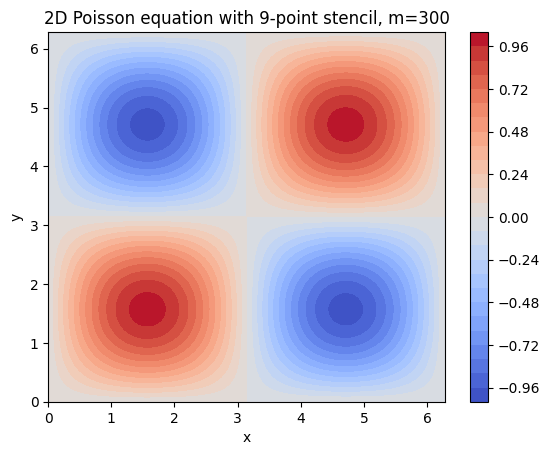

In [16]:
m = 300
X, Y, U = solve_dirichlet_laplacian_9pt(a=0, b=2*np.pi, c=0, d=2*np.pi,
                                        m_x=m, m_y=m,
                                        g_left=lambda y: 0,
                                        g_right=lambda y: 0,
                                        g_bottom=lambda x: 0,
                                        g_top=lambda x: 0,
                                        rhs=lambda x, y: -2*np.sin(x)*np.sin(y))

plt.contourf(X, Y, U, 30, cmap='coolwarm')
plt.colorbar()
plt.title(f'2D Poisson equation with 9-point stencil, m={m}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

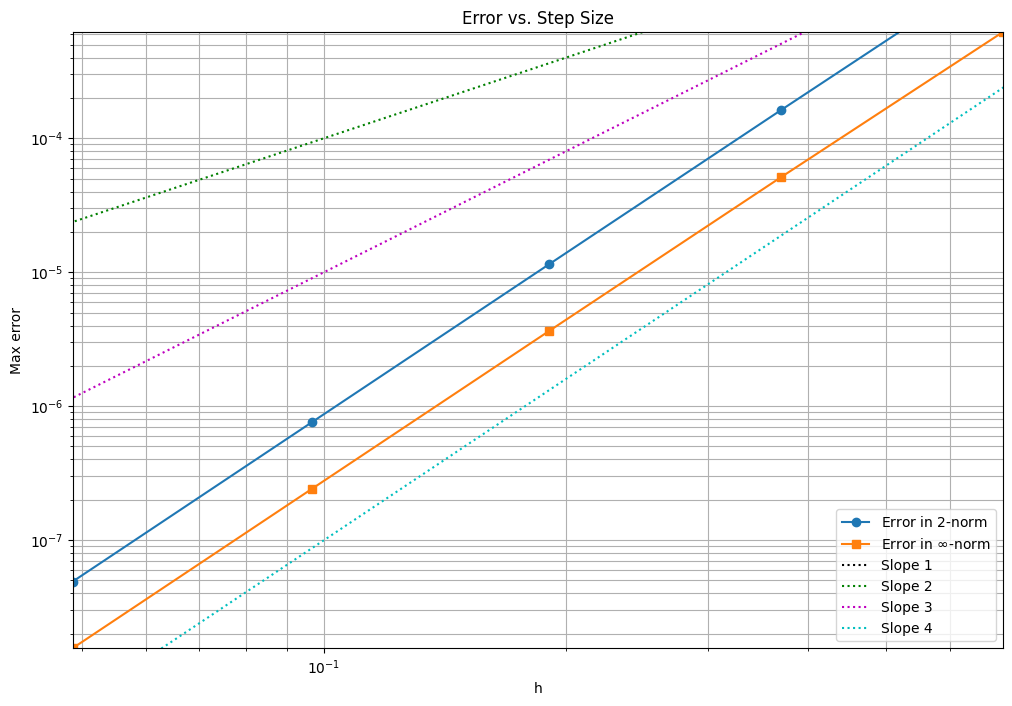

In [27]:
m_list = [8, 16, 32, 64, 128]

errors2 = []
errorsinf = []
hs = []

for m in m_list:
    X, Y, U_it = solve_dirichlet_laplacian_9pt(a=0, b=2*np.pi, c=0, d=2*np.pi,
                                        m_x=m, m_y=m,
                                        g_left=lambda y: 0,
                                        g_right=lambda y: 0,
                                        g_bottom=lambda x: 0,
                                        g_top=lambda x: 0,
                                        rhs=lambda x, y: -2*np.sin(x)*np.sin(y))
    h = (2*np.pi)/(m+1)
    E = U_it - np.sin(X)*np.sin(Y)
    
    errorinf = np.max(np.abs(E))          
    error2 = np.linalg.norm(E.ravel(), 2) * h

    errors2.append(error2)
    errorsinf.append(errorinf)
    hs.append(h)

hvec = 1.0 / 2**np.arange(30)

plt.figure(figsize=(12, 8))
plt.loglog(hs, errors2, marker='o', label=r"Error in $2$-norm")
plt.loglog(hs, errorsinf, marker='s', label=r"Error in $\infty$-norm")
plt.loglog(hvec, 0.1*hvec**1, 'k:', label="Slope 1")
plt.loglog(hvec, 0.01*hvec**2, 'g:', label="Slope 2")
plt.loglog(hvec, 0.01*hvec**3, 'm:', label="Slope 3")
plt.loglog(hvec, 0.001*hvec**4, 'c:', label="Slope 4")
plt.xlim([min(hs), max(hs)])
plt.ylim([min(errorsinf), max(errorsinf)])
plt.xlabel('h')
plt.ylabel('Max error')
plt.title('Error vs. Step Size')
plt.legend()
plt.grid(True, which='both')

---
**Exercise 2.** Consider the **Laplace equation**

$$
\begin{aligned}
\Delta u + \lambda u &= 0, & 0 < x, y < 1, \
u &= 0, & \text{on the boundaries}.
\end{aligned}
$$

* (a) Show that the **eigenvalues and eigenvectors** for this problem are

$$
\lambda_{k, l} = \pi^2 (l^2 + k^2), \quad l, k = 1, 2, \dots,
$$
$$
u_{k, l}(x, y) = \sin(k \pi x) \sin(l \pi y).
$$

* (b) Show that the standard central finite difference scheme using the five-point stencil is stable for the **Poisson equation**.

  *Hint: The eigenvectors for $\mathbf{A}^h \mathbf{U}^h = \mathbf{F}$ (eigen-grid functions) are*

  $$
  v_{p, q}^{ij} = \sin(p \pi h) \sin(q \pi h),
  \quad i, j, p, q = 1, 2, \dots, m.
  $$

  *Moreover, remember that*
  $$
  | (\mathbf{A}^h)^{-1} |_2 = \frac{1}{\min |\lambda_i (\mathbf{A}^h)|}.
  $$


---
**Exercise 3.** Write down the **coefficient matrix** of the finite difference method using the standard central five-point stencil for the Poisson equation defined on the rectangle $[a, b] \times [c, d]$. Take $m=n=3$ and assume a **Dirichlet boundary condition** at $x=a$, $y=c$ and $y=d$, and a **Neumann boundary condition** $\partial u / \partial n = g(y)$ at $x=b$. Use the **ghost point method** to deal with the Neumann boundary condition.

In [3]:
from tests.test_5lap_robin import solve_poisson_5pt_mixed

In [13]:
# Mixta: Neumann en arriba/abajo (g=0), Dirichlet en izquierda/derecha
m=300
left  = ('D', lambda y: 0.0)
right = ('D', lambda y: 0.0)
bottom= ('N', 0.0)
top   = ('N', 0.0)
X,Y,U = solve_poisson_5pt_mixed(a=0, b=2*np.pi, c=0, d=2*np.pi, 
                                m_x=64, m_y=64, 
                                left_bc=left, right_bc=right, 
                                bottom_bc=bottom, top_bc=top,
                                rhs=lambda X,Y: -2*np.sin(X)*np.sin(Y),
                                reference_value=None) 

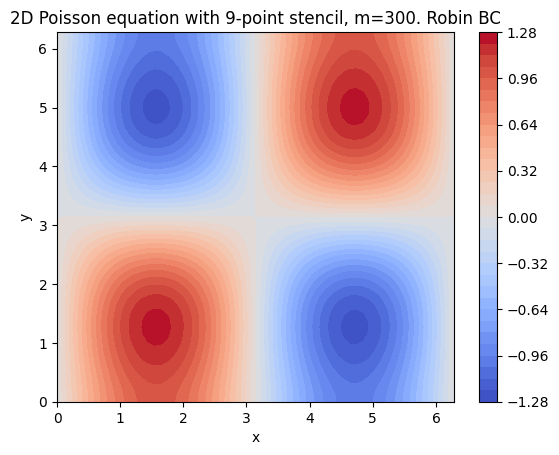

In [14]:
plt.contourf(X, Y, U, 30, cmap='coolwarm')
plt.colorbar()
plt.title(f'2D Poisson equation with 9-point stencil, m={m}. Robin BC')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

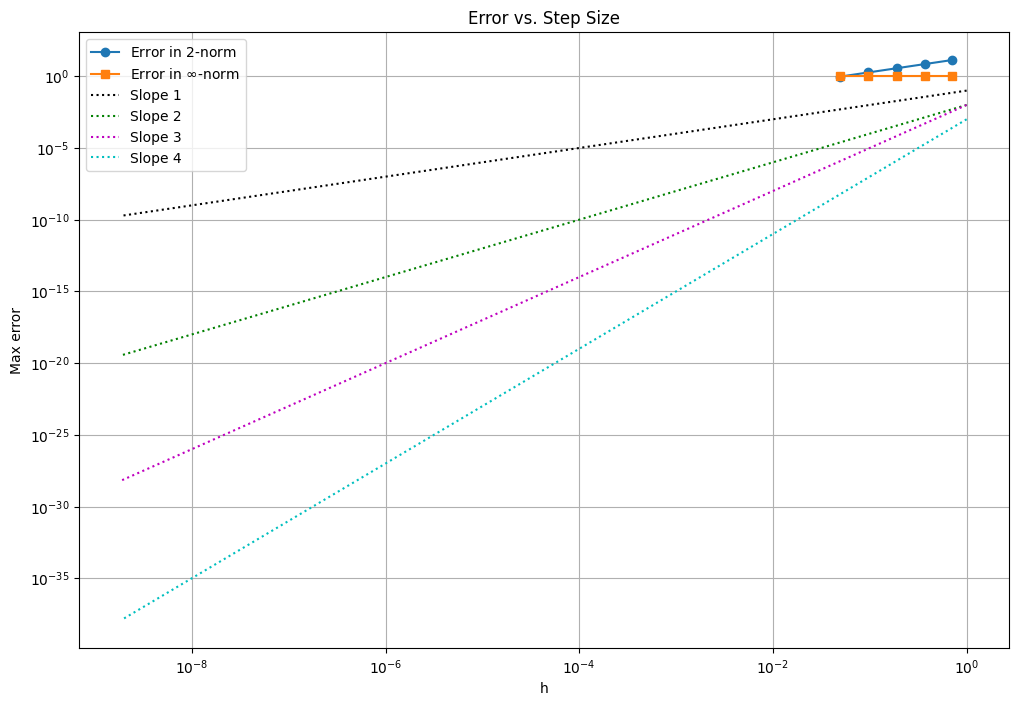

In [15]:
m_list = [8, 16, 32, 64, 128]

errors2 = []
errorsinf = []
hs = []

for m in m_list:
    X, Y, U_it = solve_poisson_5pt_mixed(a=0, b=2*np.pi, c=0, d=2*np.pi, 
                                m_x=64, m_y=64, 
                                left_bc=left, right_bc=right, 
                                bottom_bc=bottom, top_bc=top,
                                rhs=lambda X,Y: -2*np.sin(X)*np.sin(Y),
                                reference_value=None) 
    h = (2*np.pi)/(m+1)
    E = U_it - np.sin(X)*np.sin(Y)
    
    errorinf = np.max(np.abs(E))          
    error2 = np.linalg.norm(E.ravel(), 2) * h

    errors2.append(error2)
    errorsinf.append(errorinf)
    hs.append(h)

hvec = 1.0 / 2**np.arange(30)
plt.figure(figsize=(12, 8))
plt.loglog(hs, errors2, marker='o', label=r"Error in $2$-norm")
plt.loglog(hs, errorsinf, marker='s', label=r"Error in $\infty$-norm")
plt.loglog(hvec, 0.1*hvec**1, 'k:', label="Slope 1")
plt.loglog(hvec, 0.01*hvec**2, 'g:', label="Slope 2")
plt.loglog(hvec, 0.01*hvec**3, 'm:', label="Slope 3")
plt.loglog(hvec, 0.001*hvec**4, 'c:', label="Slope 4")
#plt.xlim([min(hs), max(hs)])
#plt.ylim([min(errorsinf), max(errorsinf)])
plt.xlabel('h')
plt.ylabel('Max error')
plt.title('Error vs. Step Size')
plt.legend()
plt.grid(True, which='both')

---
**Exercise 4.** Write a solver for the **Laplace equation**

$$
\begin{aligned}
\frac{1}{r} \frac{\partial}{\partial r} \left(r \frac{\partial u}{\partial r}\right) + \frac{1}{r^2} \frac{\partial^2 u}{\partial \theta^2} &= 0, & 0 < r < 1,\, 0 < \theta < 2\pi, \,
  u(r, \theta) &= u(r, \theta + 2\pi), & 0 \le r \le 1, \,
  |u(r, \theta)| &< \infty, & \forall (r, \theta) \in \Omega, \,
  u(1, \theta) &= g(\theta), & 0 \le \theta < 2\pi.
  \end{aligned}
  $$

As a check, consider a numerical test to analyze the **convergence**, i.e. choose $g(\theta)$ as you wish and do a **grid refinement study**.

Remember that the general solution to this problem is

$$
u(r, \theta) = \sum_{n=0}^\infty A_n \cos(n \theta) r^n + \sum_{n=1}^\infty B_n \sin(n \theta) r^n.
$$

In [11]:
from tests.test_5lap_polars import solve_polar_poisson_5pt

# test
m=300
RHO, THETA, U = solve_polar_poisson_5pt(R1 =1/m, R2=1.0,
                                m_r=m, n_theta=m,
                                f=lambda r, theta: 0,
                                g_outer=lambda theta: np.cos(3*theta),
                                g_inner=lambda theta: 1.0,
                                theta0=0.0, thetamax=2*np.pi
                                )

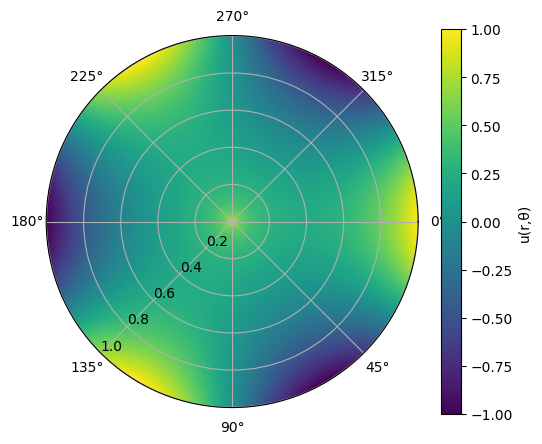

In [12]:
# Cerrar la costura en θ=0 duplicando la primera columna
TH2  = np.hstack([THETA, THETA[:, :1] + 2*np.pi])
RH2  = np.hstack([RHO, RHO[:, :1]])
U2   = np.hstack([U, U[:, :1]])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6,5))
pc = ax.pcolormesh(TH2, RH2, U2, shading='auto')
ax.set_theta_zero_location('E')     # 0 rad a la derecha
ax.set_theta_direction(-1)          # clockwise
ax.set_rlabel_position(135)         # fancy
fig.colorbar(pc, ax=ax, label='u(r,θ)')
plt.show()

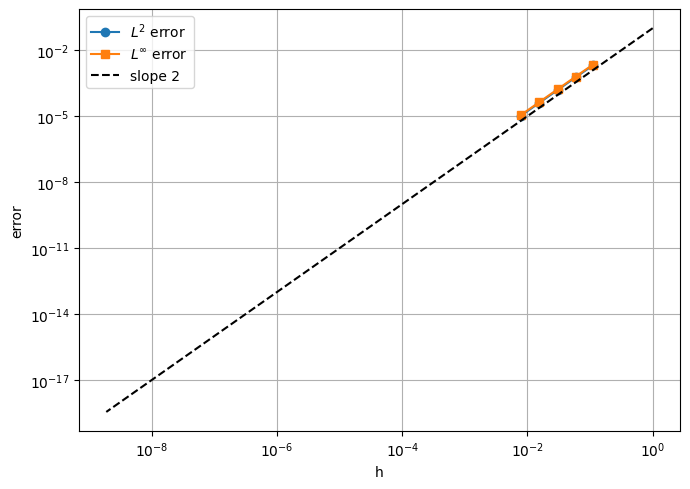

Orden estimado L2 ≈ 1.99, Linf ≈ 1.99


In [13]:
R1, R2 = 0.0, 1.0
u_exact = lambda r,th: r**3 * np.cos(3*th)

m_list = [8, 16, 32, 64, 128]
errors_L2, errors_Linf, hs = [], [], []
nmode = 3
u_exact = lambda r,th: r**nmode * np.cos(nmode*th)
g_outer = lambda th: (R2**nmode) * np.cos(nmode*th)

for m in m_list:
    dr = (R2 - R1) / (m + 1)
    # Isotropía aproximada: arco ~ dr  (como r~1 cerca del borde)
    n = max(16, int(np.round(2*np.pi / dr)))
    dth = 2*np.pi / n
    h = max(dr, dth)


    RHO, THETA, U = solve_polar_poisson_5pt(R1=R1, R2=R2,
                                            m_r=m, n_theta=n,
                                            f=lambda r,th: 0.0,
                                            g_outer=g_outer)

    Uex = u_exact(RHO, THETA)
    E   = U - Uex

    # Errores sobre nodos interiores (evitas “premiar” la frontera exacta)
    Ei = E[1:-1, :]           # i=1..m
    ri = RHO[1:-1, 0]         # r_i

    # L2(Ω) ≈ sqrt( Σ |E_ij|^2 * r_i * dr * dθ )
    err_L2  = np.sqrt( np.sum((Ei**2) * ri[:,None]) * dr * dth )
    err_Linf= np.max(np.abs(Ei))

    errors_L2.append(err_L2)
    errors_Linf.append(err_Linf)
    hs.append(h)

# Pendiente esperada: orden ~2
hvec = 1.0 / 2**np.arange(30)
plt.figure(figsize=(7,5))
plt.loglog(hs, errors_L2,  'o-', label=r'$L^2$ error')
plt.loglog(hs, errors_Linf,'s-', label=r'$L^\infty$ error')
plt.loglog(hvec, 0.1*hvec**2, 'k--', label='slope 2')
plt.xlabel('h'); plt.ylabel('error'); plt.legend(); plt.grid(True, which='both')
plt.tight_layout(); plt.show()

# Estimar orden p por regresión en log-log (últimos puntos)
p_L2   = np.polyfit(np.log(hs), np.log(errors_L2), 1)[0]
p_Linf = np.polyfit(np.log(hs), np.log(errors_Linf),1)[0]
print(f"Orden estimado L2 ≈ {p_L2:.2f}, Linf ≈ {p_Linf:.2f}")